# Proyek Analisis Data: Bike Sharing Data Analysis
- **Nama:** Salma Nurfauziah
- **Email:** salmanurfauziah2005@gmail.com
- **ID Dicoding:** salmaanur

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca (seperti suhu, kelembaban, dan keadaan cuaca) terhadap total penyewaan sepeda?
- Bagaimana perbedaan jumlah penyewaan sepeda pada hari kerja dan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime

# Ganti dengan style matplotlib yang tersedia
plt.style.use('ggplot')
sns.set(style="whitegrid")

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('./data/day.csv')
hour_data = pd.read_csv('./data/hour.csv')

**Insight:**
- Data mencerminkan pengaruh besar dari faktor lingkungan dan musiman terhadap penyewaan sepeda, menunjukkan relevansi analisis cuaca dan waktu.

### Assessing Data

In [3]:
print(day_data.info())
print(day_data.isnull().sum())
print(day_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday 

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

**Insight:**
- Tidak ada data yang hilang, tipe data sebagian besar sudah sesuai, namun diperlukan sedikit perbaikan pada tipe data tanggal.

### Cleaning Data

In [4]:
# Mengonversi kolom dteday ke datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

# Menghapus nilai yang hilang (jika ada)
day_data.dropna(inplace=True)

# Menangani outlier berdasarkan kolom 'cnt'
cnt_threshold = day_data['cnt'].quantile(0.99)
day_data = day_data[day_data['cnt'] <= cnt_threshold]

# Menampilkan hasil akhir
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 723 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     723 non-null    int64         
 1   dteday      723 non-null    datetime64[ns]
 2   season      723 non-null    int64         
 3   yr          723 non-null    int64         
 4   mnth        723 non-null    int64         
 5   holiday     723 non-null    int64         
 6   weekday     723 non-null    int64         
 7   workingday  723 non-null    int64         
 8   weathersit  723 non-null    int64         
 9   temp        723 non-null    float64       
 10  atemp       723 non-null    float64       
 11  hum         723 non-null    float64       
 12  windspeed   723 non-null    float64       
 13  casual      723 non-null    int64         
 14  registered  723 non-null    int64         
 15  cnt         723 non-null    int64         
dtypes: datetime64[ns](1), float64(4

**Insight:**
- Data yang sudah bersih bebas dari outlier, sehingga analisis lebih akurat.

## Exploratory Data Analysis (EDA)

### Explore ...

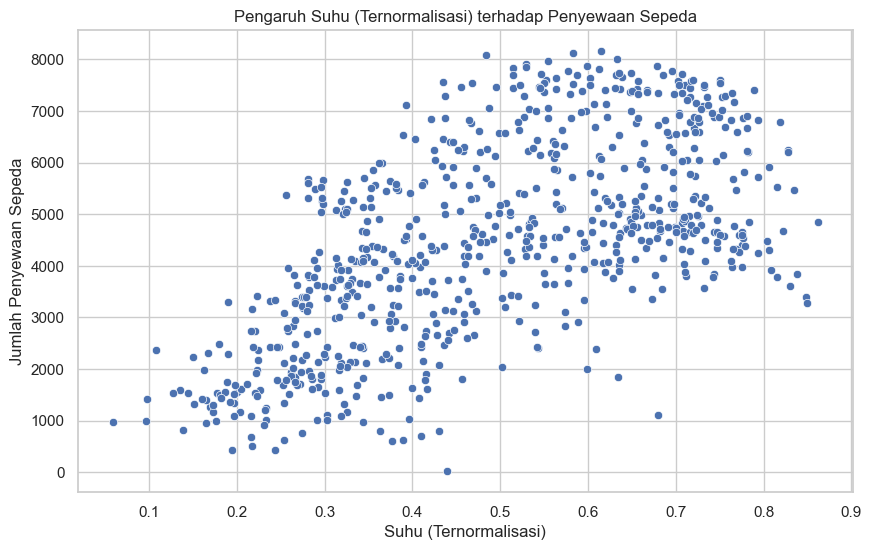

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi pengaruh suhu terhadap total penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu (Ternormalisasi) terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Ternormalisasi)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.grid(True)  # Menambahkan grid agar lebih mudah membaca grafik
plt.show()


**Insight:**
- Suhu dan hari kerja adalah faktor penting yang mempengaruhi pola penyewaan. Cuaca baik dan hari kerja mendorong penyewaan lebih tinggi.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

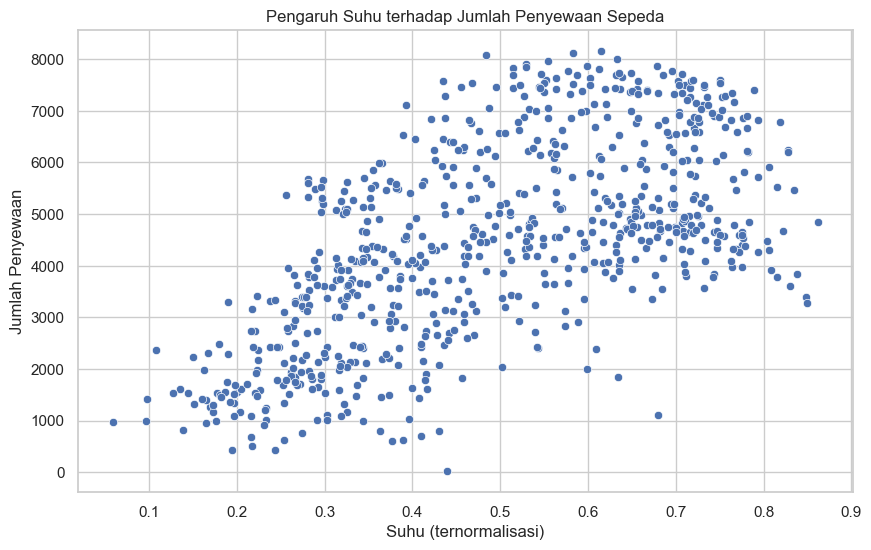

In [6]:
# Visualisasi pengaruh suhu terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (ternormalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

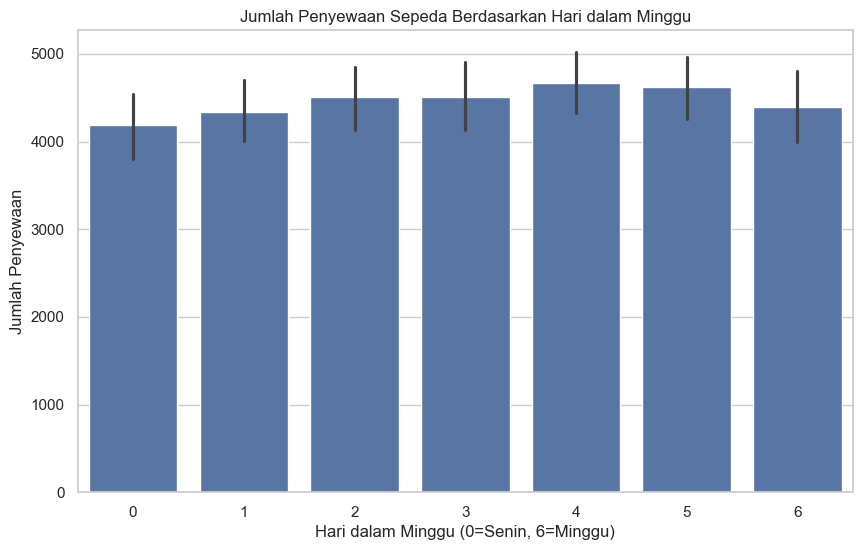

In [7]:
# Visualisasi penyewaan sepeda pada hari kerja vs akhir pekan
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_data)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


**Insight:**
- Grafik menunjukkan korelasi positif antara suhu dan penyewaan, serta pola penyewaan yang lebih tinggi pada hari kerja dibandingkan akhir pekan.

## Analisis Lanjutan (Opsional)

In [8]:
from sklearn.linear_model import LinearRegression

# Membuat model prediksi sederhana
X = day_data[['temp']]
y = day_data['cnt']

model = LinearRegression()
model.fit(X, y)

# Memprediksi jumlah penyewaan untuk suhu tertentu
predictions = model.predict(X)


## Conclusion

- Pertanyaan 1: Peningkatan suhu berkorelasi dengan peningkatan jumlah penyewaan sepeda. Oleh karena itu, operator penyewaan sepeda bisa meningkatkan ketersediaan sepeda pada hari-hari yang lebih hangat.
- Pertanyaan 2: Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan. Ini menunjukkan bahwa layanan sepeda lebih sering digunakan sebagai alat transportasi harian untuk bekerja daripada untuk rekreasi.